# <b> Decision Tree Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

df = pd.read_csv(os.path.join('NYPD_Arrest_Data_Clean.csv'))
df2 = pd.read_csv(os.path.join('NYPD_Arrest_Data_Clean_Demographics.csv'))

In [3]:
df

,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,MONTH,FALL,SPRING,SUMMER,WINTER,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN_ISLAND
0,17,0,105,0,40.737043,-73.735514,1,False,False,False,True,False,False,False,True,False
1,4,0,107,71,40.732881,-73.807899,2,False,False,False,True,False,False,False,True,False
2,17,0,48,0,40.855109,-73.892818,3,False,True,False,False,True,False,False,False,False
3,17,0,121,0,40.628967,-74.163275,5,False,True,False,False,False,False,False,False,True
4,17,0,100,0,40.591980,-73.800066,6,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193605,47,1,109,0,40.757691,-73.834115,9,True,False,False,False,False,False,False,True,False
193606,5,1,34,0,40.856808,-73.928265,9,True,False,False,False,False,False,True,False,False
193607,7,0,23,0,40.786116,-73.942614,9,True,False,False,False,False,False,True,False,False
193608,43,1,44,1,40.827812,-73.925929,9,True,False,False,False,True,False,False,False,False


In [4]:
df2

,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,MONTH,FALL,SPRING,SUMMER,...,AGE_GROUP_<18,PERP_SEX_F,PERP_SEX_M,PERP_RACE_AMERICAN INDIAN/ALASKAN NATIVE,PERP_RACE_ASIAN / PACIFIC ISLANDER,PERP_RACE_BLACK,PERP_RACE_BLACK HISPANIC,PERP_RACE_UNKNOWN,PERP_RACE_WHITE,PERP_RACE_WHITE HISPANIC
0,17,0,105,0,40.737043,-73.735514,1,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,4,0,107,71,40.732881,-73.807899,2,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,17,0,48,0,40.855109,-73.892818,3,False,True,False,...,False,False,True,False,False,True,False,False,False,False
3,17,0,121,0,40.628967,-74.163275,5,False,True,False,...,False,False,True,False,False,False,False,False,True,False
4,17,0,100,0,40.591980,-73.800066,6,False,False,True,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193605,47,1,109,0,40.757691,-73.834115,9,True,False,False,...,False,False,True,False,False,False,False,False,False,True
193606,5,1,34,0,40.856808,-73.928265,9,True,False,False,...,False,False,True,False,False,False,False,False,False,True
193607,7,0,23,0,40.786116,-73.942614,9,True,False,False,...,False,False,True,False,False,False,False,False,True,False
193608,43,1,44,1,40.827812,-73.925929,9,True,False,False,...,False,False,True,False,False,True,False,False,False,False


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='OFFENSE_LEVEL')
y = df['OFFENSE_LEVEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

X2 = df2.drop(columns='OFFENSE_LEVEL')
y2 = df2['OFFENSE_LEVEL']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=1234)

# <b> DT for Data without Demographics

In [6]:
# run a Decision Tree Classifier on df
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=1234)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)

print('Accuracy of DTree:', accuracy_score(y_test, y_pred))

Accuracy of DTree: 0.9257958438785875


# <b> DT for Data with Demographics

In [7]:
# run a Decision Tree Classifier on df
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt2 = DecisionTreeClassifier(random_state=1234)
dt2.fit(X_train2, y_train2)
y_pred2 = dt2.predict(X_test2)

accuracy_score(y_test2, y_pred2)

print('Accuracy of DTree w/Demographics:', accuracy_score(y_test2, y_pred2))

Accuracy of DTree w/Demographics: 0.9231616824199852


# <b> Hyperparameter Tuning

In [8]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

In [9]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

grid_search.best_params_
print('Best Params:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Fitting 3 folds for each of 126 candidates, totalling 378 fits
[CV 2/3] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.878 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.880 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=10;, score=0.880 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.880 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.878 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.880 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2;, score=0.880 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=10;, score=0.880 total time=   0.1s
[CV 1/3] END cr

In [10]:
#Best Params: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10}
#Best Score: 0.9276970758601738

dt_best = grid_search.best_estimator_
y_pred_best = dt_best.predict(X_test)

accuracy_score(y_test, y_pred_best)

print('Accuracy of DTree w/Best Params:', accuracy_score(y_test, y_pred_best))


Accuracy of DTree w/Best Params: 0.9285849560112254


In [11]:
# incorporate MAE and RMSE and MSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

rmse = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

MAE: 0.07649398274882496
MSE: 0.08107363600364995
RMSE: 0.28473432529930415


In [12]:
# run grid search on df2
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search2 = GridSearchCV(estimator=dt2, param_grid=param_grid, cv=3, n_jobs=-1, verbose=3)
grid_search2.fit(X_train2, y_train2)

grid_search2.best_params_
print('Best Params:', grid_search2.best_params_)
print('Best Score:', grid_search2.best_score_)

Fitting 3 folds for each of 126 candidates, totalling 378 fits
[CV 1/3] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.880 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.878 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.880 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.880 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.878 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.880 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=10;, score=0.880 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=10;, score=0.878 total time=   0.1s
[CV 3/3] END cr

In [13]:
# Best Params: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10}
# Best Score: 0.9282873632167267

dt_best2 = grid_search2.best_estimator_
y_pred_best2 = dt_best2.predict(X_test2)

accuracy_score(y_test2, y_pred_best2)

print('Accuracy of DTree w/Best Params w/Demographics:', accuracy_score(y_test2, y_pred_best2))


Accuracy of DTree w/Best Params w/Demographics: 0.9272937003942634


In [14]:
# incorporate MAE and RMSE and MSE for df2
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

mae2 = mean_absolute_error(y_test2, y_pred2)
print('MAE:', mae2)

mse2 = mean_squared_error(y_test2, y_pred2)
print('MSE:', mse2)

rmse2 = sqrt(mean_squared_error(y_test2, y_pred2))
print('RMSE:', rmse2)

MAE: 0.07909371072430832
MSE: 0.08360449701289534
RMSE: 0.2891444224136017


# <b> Analysis, Accuracy, and Metrics

In [15]:
#Best Params: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10}

# df with best params

dt_best = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4, min_samples_split=10, random_state=1234)
dt_best.fit(X_train, y_train)
y_pred_best = dt_best.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_best)
print('Accuracy:', accuracy)

# df2 with best params
dt_best2 = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4, min_samples_split=10, random_state=1234)
dt_best2.fit(X_train2, y_train2)
y_pred_best2 = dt_best2.predict(X_test2)

accuracy2 = accuracy_score(y_test2, y_pred_best2)
print('Accuracy:', accuracy2)

Accuracy: 0.9285849560112254
Accuracy: 0.9272937003942634


In [16]:
# generate classification report for df and df2
from sklearn.metrics import classification_report

print('Classification Report for df:')
print(classification_report(y_test, y_pred_best))

print('Classification Report for df2:')
print(classification_report(y_test2, y_pred_best2))



Classification Report for df:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     24823
           1       0.96      0.92      0.94     32721
           2       0.94      0.85      0.89       539

    accuracy                           0.93     58083
   macro avg       0.93      0.90      0.92     58083
weighted avg       0.93      0.93      0.93     58083

Classification Report for df2:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     24823
           1       0.95      0.92      0.94     32721
           2       0.94      0.85      0.90       539

    accuracy                           0.93     58083
   macro avg       0.93      0.90      0.92     58083
weighted avg       0.93      0.93      0.93     58083



In [17]:
# Generate classification report
report = classification_report(y_test, y_pred_best, digits=2, output_dict=True)
df = pd.DataFrame(report).T

# Convert support column to integer
df['support'] = df['support'].apply(int)

# Apply background gradient
styled_df = df.style.background_gradient(cmap='viridis', subset=pd.IndexSlice['0':'9', :'f1-score'])

# Display the styled DataFrame
styled_df

,precision,recall,f1-score,support
0,0.893831,0.945575,0.918975,24823
1,0.957464,0.916995,0.936793,32721
2,0.944330,0.849722,0.894531,539
accuracy,0.928585,0.928585,0.928585,0
macro avg,0.931875,0.904097,0.916766,58083
weighted avg,0.930147,0.928585,0.928786,58083


In [18]:
# Generate classification report
report = classification_report(y_test2, y_pred_best2, digits=2, output_dict=True)
df = pd.DataFrame(report).T

# Convert support column to integer
df['support'] = df['support'].apply(int)

# Apply background gradient
styled_df = df.style.background_gradient(cmap='viridis', subset=pd.IndexSlice['0':'9', :'f1-score'])

# Display the styled DataFrame
styled_df

,precision,recall,f1-score,support
0,0.896273,0.938807,0.917047,24823
1,0.952556,0.919776,0.935879,32721
2,0.944559,0.853432,0.896686,539
accuracy,0.927294,0.927294,0.927294,0
macro avg,0.931129,0.904005,0.916537,58083
weighted avg,0.928428,0.927294,0.927467,58083


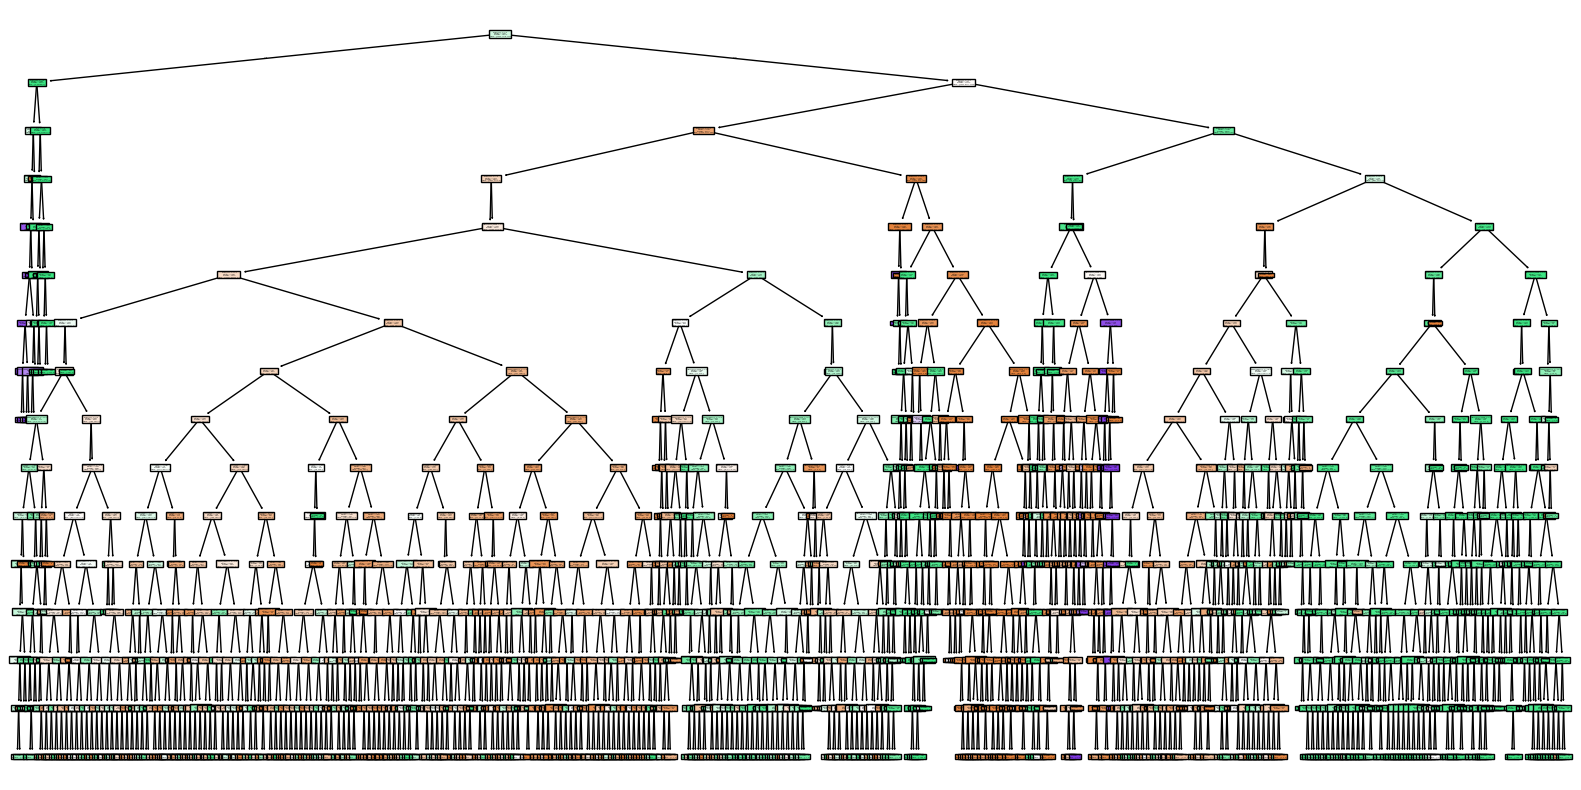

In [19]:
# vizualize the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt_best, feature_names=X.columns, filled=True)
plt.show()

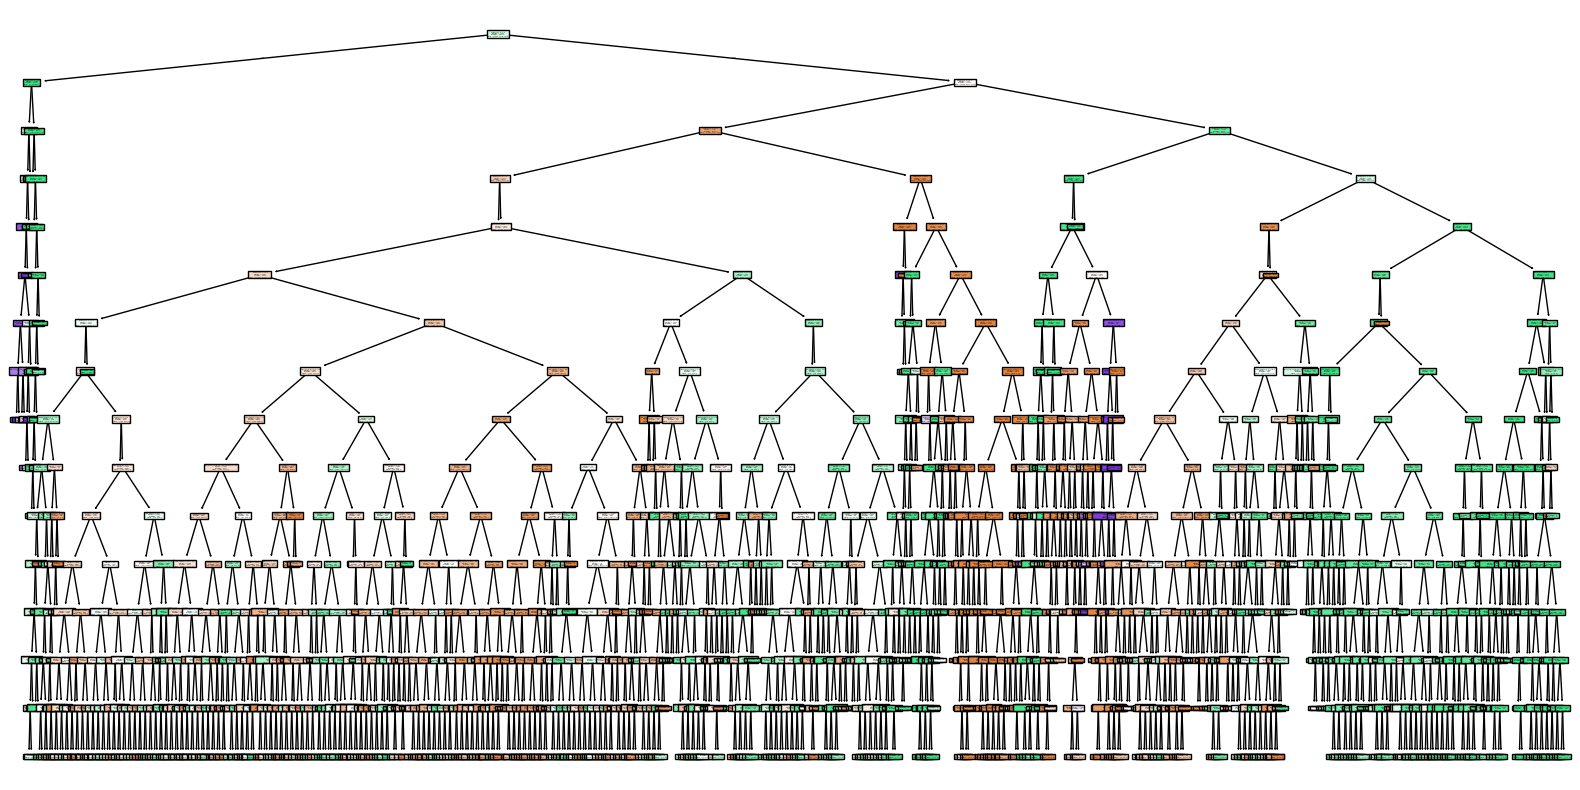

In [20]:
# vizualize the decision tree for df2
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt_best2, feature_names=X2.columns, filled=True)

plt.show()

In [21]:
from sklearn import tree
import graphviz 

# Assuming you have a trained decision tree model named 'clf'
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=class_names,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree") 

NameError: name 'clf' is not defined

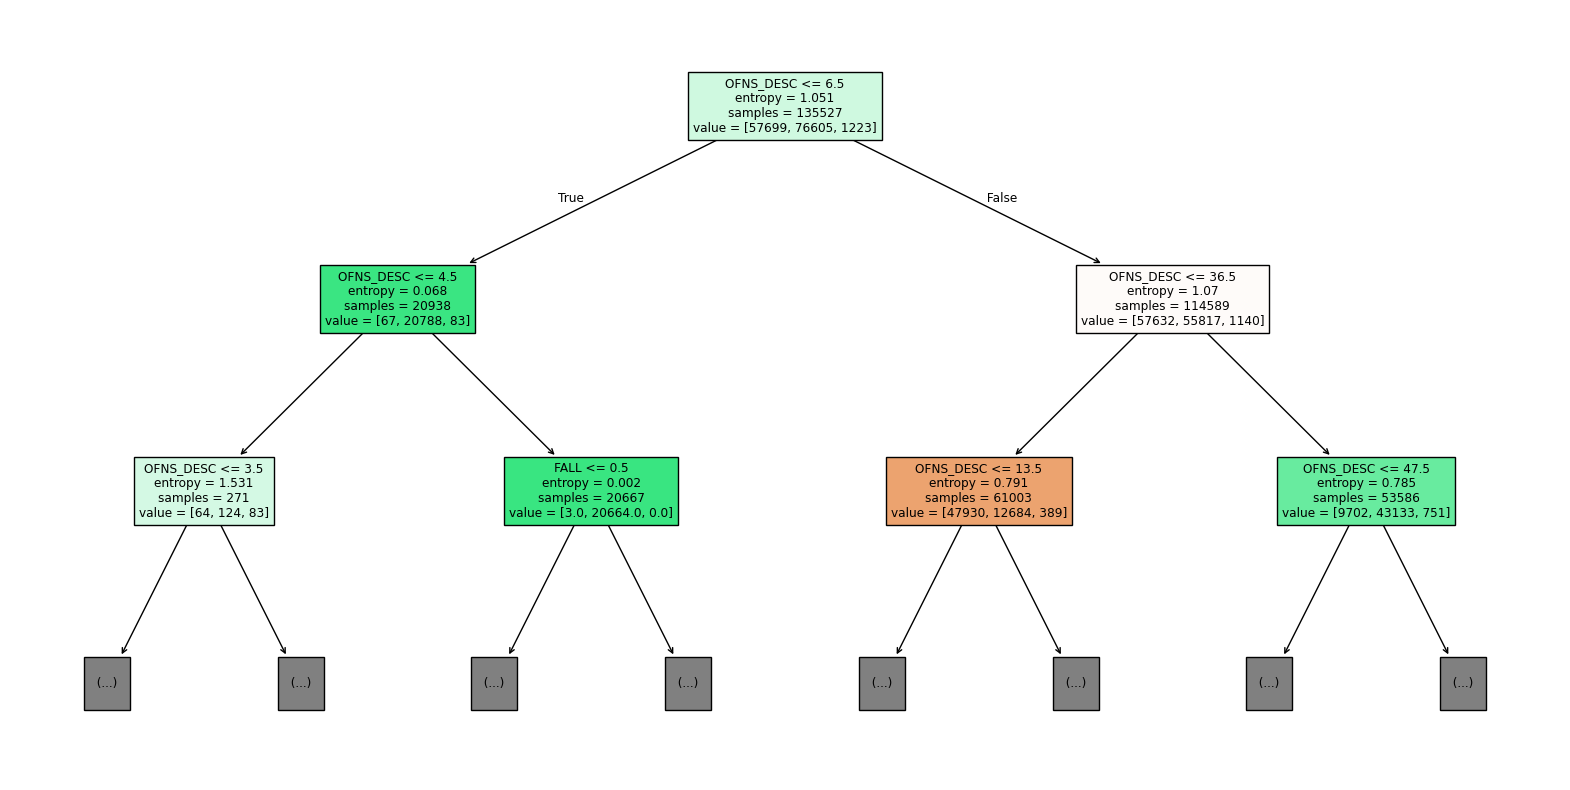

In [ ]:
# Visualize the decision tree with limited depth
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt_best, feature_names=X.columns, filled=True, max_depth=2)  # Adjust max_depth as needed
plt.show()

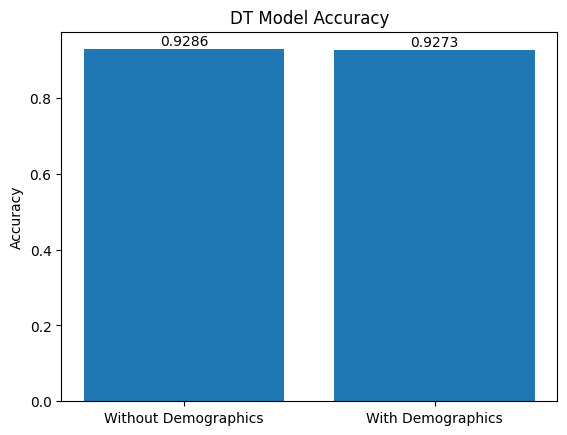

In [ ]:
# plot the accuracies of the DT models
accuracies = [accuracy, accuracy2]
labels = ['Without Demographics', 'With Demographics']

plt.bar(labels, accuracies)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, str(round(v, 4)), ha='center')
plt.ylabel('Accuracy')
plt.title('DT Model Accuracy')
plt.show()


# <b> CART 4.5

In [ ]:
# train best decision tree on df with criterion gini
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_leaf=4, min_samples_split=10, random_state=1234)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)
print('Accuracy:', accuracy_gini)

# train best decision tree on df2 with criterion gini
dt_gini2 = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_leaf=4, min_samples_split=10, random_state=1234)
dt_gini2.fit(X_train2, y_train2)
y_pred_gini2 = dt_gini2.predict(X_test2)

accuracy_gini2 = accuracy_score(y_test2, y_pred_gini2)
print('Accuracy:', accuracy_gini2)

Accuracy: 0.9281717542137975
Accuracy: 0.9279135030904051


In [ ]:
# print classification report for df with criterion gini
print('Classification Report for DT C4.5:')
print(classification_report(y_test, y_pred_gini))

# print classification report for df2 with criterion gini
print('Classification Report for DT C4.5 w/Demographics:')
print(classification_report(y_test2, y_pred_gini2))


Classification Report for DT C4.5:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     24823
           1       0.95      0.92      0.94     32721
           2       0.94      0.85      0.89       539

    accuracy                           0.93     58083
   macro avg       0.93      0.90      0.92     58083
weighted avg       0.93      0.93      0.93     58083

Classification Report for DT C4.5 w/Demographics:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     24823
           1       0.96      0.92      0.94     32721
           2       0.94      0.86      0.90       539

    accuracy                           0.93     58083
   macro avg       0.93      0.91      0.92     58083
weighted avg       0.93      0.93      0.93     58083



In [ ]:
# Generate classification report
report = classification_report(y_test, y_pred_gini, digits=2, output_dict=True)
df = pd.DataFrame(report).T

# Convert support column to integer
df['support'] = df['support'].apply(int)

# Apply background gradient
styled_df = df.style.background_gradient(cmap='viridis', subset=pd.IndexSlice['0':'9', :'f1-score'])

# Display the styled DataFrame
styled_df

,precision,recall,f1-score,support
0,0.898346,0.938444,0.917957,24823
1,0.952407,0.921641,0.936771,32721
2,0.940574,0.851577,0.893866,539
accuracy,0.928172,0.928172,0.928172,0
macro avg,0.930442,0.903887,0.916198,58083
weighted avg,0.929193,0.928172,0.928332,58083


In [ ]:
# generate classification report for df2 with criterion gini
report = classification_report(y_test2, y_pred_gini2, digits=2, output_dict=True)
df = pd.DataFrame(report).T

# Convert support column to integer
df['support'] = df['support'].apply(int)

# Apply background gradient
styled_df = df.style.background_gradient(cmap='viridis', subset=pd.IndexSlice['0':'9', :'f1-score'])

# Display the styled DataFrame
styled_df

,precision,recall,f1-score,support
0,0.894236,0.943158,0.918046,24823
1,0.955749,0.917515,0.936242,32721
2,0.942857,0.857143,0.897959,539
accuracy,0.927914,0.927914,0.927914,0
macro avg,0.930948,0.905938,0.917416,58083
weighted avg,0.929341,0.927914,0.928110,58083
